## Bioinformatics - Data Collection and Pre-Processing

In [2]:
import pandas as pd
from chembl_webresource_client.new_client import new_client

In [4]:
# Target search for coronavirus
target = new_client.target
target_query = target.search('CHEMBL3577')
targets = pd.DataFrame.from_dict(target_query)
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,"[{'xref_id': 'P00352', 'xref_name': None, 'xre...",Homo sapiens,Aldehyde dehydrogenase 1A1,14.0,False,CHEMBL3577,"[{'accession': 'P00352', 'component_descriptio...",SINGLE PROTEIN,9606
1,[],Homo sapiens,Aldehyde dehydrogenase,5.0,False,CHEMBL3542434,"[{'accession': 'P51649', 'component_descriptio...",PROTEIN FAMILY,9606


In [5]:
selected_target = targets.target_chembl_id[0] # retrieve bioactivity data reported as IC50 values
activity = new_client.activity
res = activity.filter(target_chembl_id=selected_target).filter(standard_type="Potency")

In [6]:
df = pd.DataFrame.from_dict(res)
df

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,Inconclusive,4117815,[],CHEMBL1614458,PUBCHEM_BIOASSAY: qHTS Assay for Inhibitors of...,F,None,None,BAO_0000186,...,Homo sapiens,Aldehyde dehydrogenase 1A1,9606,None,None,Potency,um,UO_0000065,None,39.8107
1,None,Inconclusive,4117816,[],CHEMBL1614458,PUBCHEM_BIOASSAY: qHTS Assay for Inhibitors of...,F,None,None,BAO_0000186,...,Homo sapiens,Aldehyde dehydrogenase 1A1,9606,None,None,Potency,um,UO_0000065,None,39.8107
2,None,Inconclusive,4117817,[],CHEMBL1614458,PUBCHEM_BIOASSAY: qHTS Assay for Inhibitors of...,F,None,None,BAO_0000186,...,Homo sapiens,Aldehyde dehydrogenase 1A1,9606,None,None,Potency,um,UO_0000065,None,28.1838
3,None,Inconclusive,4117818,[],CHEMBL1614458,PUBCHEM_BIOASSAY: qHTS Assay for Inhibitors of...,F,None,None,BAO_0000186,...,Homo sapiens,Aldehyde dehydrogenase 1A1,9606,None,None,Potency,um,UO_0000065,None,8.9125
4,None,Inconclusive,4117819,[],CHEMBL1614458,PUBCHEM_BIOASSAY: qHTS Assay for Inhibitors of...,F,None,None,BAO_0000186,...,Homo sapiens,Aldehyde dehydrogenase 1A1,9606,None,None,Potency,um,UO_0000065,None,19.9526
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76240,None,active,15527679,[],CHEMBL3562125,PubChem BioAssay. Extended Characterization of...,F,None,None,BAO_0000186,...,Homo sapiens,Aldehyde dehydrogenase 1A1,9606,None,None,Potency,uM,UO_0000065,None,21.5227
76241,None,active,15527680,[],CHEMBL3562125,PubChem BioAssay. Extended Characterization of...,F,None,None,BAO_0000186,...,Homo sapiens,Aldehyde dehydrogenase 1A1,9606,None,None,Potency,uM,UO_0000065,None,6.0659
76242,None,active,15527681,[],CHEMBL3562125,PubChem BioAssay. Extended Characterization of...,F,None,None,BAO_0000186,...,Homo sapiens,Aldehyde dehydrogenase 1A1,9606,None,None,Potency,uM,UO_0000065,None,0.6066
76243,None,active,15527682,[],CHEMBL3562125,PubChem BioAssay. Extended Characterization of...,F,None,None,BAO_0000186,...,Homo sapiens,Aldehyde dehydrogenase 1A1,9606,None,None,Potency,uM,UO_0000065,None,3.4111


In [7]:
df.to_csv('data/bioactivity_raw.csv',index=False)

### Handling missing data

In [22]:
import pandas as pd
df = pd.read_csv('data/bioactivity_raw.csv',dtype = {'Canonical_smiles':str})

/var/folders/pj/44_k69r55f7c8lndy32p_y1m0000gn/T/ipykernel_32164/2451697761.py:2: DtypeWarning: Columns (13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/bioactivity_raw.csv',dtype = {'Canonical_smiles':str})


In [23]:
df2 = df[df.standard_value.notna()]
df2 = df2[df2.canonical_smiles.notna()]
print(f"The shape for df1 and df2 are {df.shape} and {df2.shape}")

The shape for df1 and df2 are (76245, 46) and (76166, 46)


In [24]:
selection = ['molecule_chembl_id','canonical_smiles','standard_value']
df3 = df2[selection]
df3.reset_index(drop=True, inplace=True)
df3

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL3213329,Cc1ccc(/C=N/c2sc3c(c2C(N)=O)CCCC3)o1,39810.7
1,CHEMBL1565675,COc1ccc2c(c1)c(C(=O)CNc1nc(C)cs1)c(C)n2C.I,39810.7
2,CHEMBL1526690,CCCCc1ccc(/C=C2\C(=O)c3ccccc3C(O)=C2C(=O)OCC)cc1,28183.8
3,CHEMBL3193591,C(=N/Nc1nnnn1-c1ccccc1)\c1ccncc1,8912.5
4,CHEMBL1408158,CN(C)c1oc(-c2ccccc2Cl)nc1S(=O)(=O)c1ccccc1,19952.6
...,...,...,...
76161,CHEMBL2145423,Cc1cc(C)nc(NC(=S)N2CCN(c3cc(C(F)(F)F)nc4ccc(C(...,21522.7
76162,CHEMBL2134359,COc1cccc(NC(=S)N2CCN(c3ccc(Cl)c(Cl)c3)CC2)n1,6065.9
76163,CHEMBL3102994,Cc1cc(-c2nnc3n2CCCCC3)c(C)n1-c1ccc(Cl)c(Cl)c1,606.6
76164,CHEMBL3561489,COc1ccc(NC(=S)N2CCN(c3cccc(C(F)(F)F)c3)CC2)nc1,3411.1


In [25]:
df3.standard_value.describe()

count     76166.000000
mean      25639.692098
std       13154.911510
min           0.700000
25%       14125.400000
50%       28183.800000
75%       39810.700000
max      398107.200000
Name: standard_value, dtype: float64

In [30]:
import numpy as np

def logPotency(input):

    # for i in input['standard_value']:
    #     molar = i*(10**-9) # Converts nM to M
    #     logPot.append(-np.log10(i))

    logPot = [(-np.log10(i*(10**-9))) for i in input['standard_value']]
    return logPot

In [32]:
logPoten = logPotency(df3)
logPoten

[4.40000018605658,
 4.40000018605658,
 4.550000451689026,
 5.050000457140078,
 4.700000503883016,
 4.40000018605658,
 4.849999245077863,
 4.650000220873455,
 4.40000018605658,
 5.0999990348465305,
 4.40000018605658,
 4.749999855918706,
 4.450000476425332,
 5.149997413907539,
 4.650000220873455,
 4.40000018605658,
 4.40000018605658,
 4.899998417198648,
 4.349999603463148,
 4.40000018605658,
 5.0,
 4.450000476425332,
 6.224243962155902,
 4.800000874803203,
 4.899998417198648,
 6.199970640755866,
 4.899998417198648,
 4.650000220873455,
 4.499999678657065,
 4.40000018605658,
 4.550000451689026,
 4.424229251978577,
 4.40000018605658,
 4.700000503883016,
 4.550000451689026,
 4.749999855918706,
 4.749999855918706,
 4.800000874803203,
 4.949999401714238,
 4.550000451689026,
 4.650000220873455,
 4.40000018605658,
 4.650000220873455,
 4.59999938302362,
 5.0999990348465305,
 4.550000451689026,
 5.149997413907539,
 5.0,
 4.424229251978577,
 4.59999938302362,
 4.40000018605658,
 4.700000503883016,


In [33]:
df3['logPotency'] = logPoten
df3

/var/folders/pj/44_k69r55f7c8lndy32p_y1m0000gn/T/ipykernel_32164/1710134476.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['logPotency'] = logPoten


,molecule_chembl_id,canonical_smiles,standard_value,logPotency
0,CHEMBL3213329,Cc1ccc(/C=N/c2sc3c(c2C(N)=O)CCCC3)o1,39810.7,4.400000
1,CHEMBL1565675,COc1ccc2c(c1)c(C(=O)CNc1nc(C)cs1)c(C)n2C.I,39810.7,4.400000
2,CHEMBL1526690,CCCCc1ccc(/C=C2\C(=O)c3ccccc3C(O)=C2C(=O)OCC)cc1,28183.8,4.550000
3,CHEMBL3193591,C(=N/Nc1nnnn1-c1ccccc1)\c1ccncc1,8912.5,5.050000
4,CHEMBL1408158,CN(C)c1oc(-c2ccccc2Cl)nc1S(=O)(=O)c1ccccc1,19952.6,4.700001
...,...,...,...,...
76161,CHEMBL2145423,Cc1cc(C)nc(NC(=S)N2CCN(c3cc(C(F)(F)F)nc4ccc(C(...,21522.7,4.667103
76162,CHEMBL2134359,COc1cccc(NC(=S)N2CCN(c3ccc(Cl)c(Cl)c3)CC2)n1,6065.9,5.217105
76163,CHEMBL3102994,Cc1cc(-c2nnc3n2CCCCC3)c(C)n1-c1ccc(Cl)c(Cl)c1,606.6,6.217098
76164,CHEMBL3561489,COc1ccc(NC(=S)N2CCN(c3cccc(C(F)(F)F)c3)CC2)nc1,3411.1,5.467106


In [34]:
df3.logPotency.describe()

count    76166.000000
mean         4.716183
std          0.448631
min          3.400000
25%          4.400000
50%          4.550000
75%          4.849999
max          9.154902
Name: logPotency, dtype: float64

In [35]:
df3.to_csv('data/logPotency_76166*4.csv')

## Dataset Preparation

In [36]:
import pandas as pd
df = pd.read_csv('data/logPotency_76166*4.csv')
df

,Unnamed: 0,molecule_chembl_id,canonical_smiles,standard_value,logPotency
0,0,CHEMBL3213329,Cc1ccc(/C=N/c2sc3c(c2C(N)=O)CCCC3)o1,39810.7,4.400000
1,1,CHEMBL1565675,COc1ccc2c(c1)c(C(=O)CNc1nc(C)cs1)c(C)n2C.I,39810.7,4.400000
2,2,CHEMBL1526690,CCCCc1ccc(/C=C2\C(=O)c3ccccc3C(O)=C2C(=O)OCC)cc1,28183.8,4.550000
3,3,CHEMBL3193591,C(=N/Nc1nnnn1-c1ccccc1)\c1ccncc1,8912.5,5.050000
4,4,CHEMBL1408158,CN(C)c1oc(-c2ccccc2Cl)nc1S(=O)(=O)c1ccccc1,19952.6,4.700001
...,...,...,...,...,...
76161,76161,CHEMBL2145423,Cc1cc(C)nc(NC(=S)N2CCN(c3cc(C(F)(F)F)nc4ccc(C(...,21522.7,4.667103
76162,76162,CHEMBL2134359,COc1cccc(NC(=S)N2CCN(c3ccc(Cl)c(Cl)c3)CC2)n1,6065.9,5.217105
76163,76163,CHEMBL3102994,Cc1cc(-c2nnc3n2CCCCC3)c(C)n1-c1ccc(Cl)c(Cl)c1,606.6,6.217098
76164,76164,CHEMBL3561489,COc1ccc(NC(=S)N2CCN(c3cccc(C(F)(F)F)c3)CC2)nc1,3411.1,5.467106


In [37]:
selection = ['canonical_smiles','molecule_chembl_id']
df_selection = df[selection]
df_selection.to_csv('molecule.smi', sep='\t', index=False, header=False)

In [41]:
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh

--2023-07-07 15:48:37--  https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip [following]
--2023-07-07 15:48:38--  https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8003::154, 2606:50c0:8001::154, 2606:50c0:8000::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8003::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25768637 (25M) [application/zip]
Saving to: 'padel.zip'

padel.zip           100%[===================>]  24.57M  28.8MB/s    in 0.9s    

2023-07-07 15:48:40 (28.8 MB/s) - 'padel.zip' saved [25768637/25768637]

--2023-07-07 15:48:40-

In [42]:
! unzip padel.zip

Archive:  padel.zip
   creating: PaDEL-Descriptor/
  inflating: __MACOSX/._PaDEL-Descriptor  
  inflating: PaDEL-Descriptor/MACCSFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._MACCSFingerprinter.xml  
  inflating: PaDEL-Descriptor/AtomPairs2DFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._AtomPairs2DFingerprinter.xml  
  inflating: PaDEL-Descriptor/EStateFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._EStateFingerprinter.xml  
  inflating: PaDEL-Descriptor/Fingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._Fingerprinter.xml  
  inflating: PaDEL-Descriptor/.DS_Store  
  inflating: __MACOSX/PaDEL-Descriptor/._.DS_Store  
   creating: PaDEL-Descriptor/license/
  inflating: __MACOSX/PaDEL-Descriptor/._license  
  inflating: PaDEL-Descriptor/KlekotaRothFingerprintCount.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._KlekotaRothFingerprintCount.xml  
  inflating: PaDEL-Descriptor/config  
  inflating: __MACOSX/PaDEL-Descriptor/._config  
  inf

In [43]:
! bash padel.sh

Processing CHEMBL3213329 in molecule.smi (1/76166). 
Processing CHEMBL1565675 in molecule.smi (2/76166). 
Processing CHEMBL1526690 in molecule.smi (3/76166). 
Processing CHEMBL3193591 in molecule.smi (4/76166). 
Processing CHEMBL1408158 in molecule.smi (5/76166). 
Processing CHEMBL1477222 in molecule.smi (6/76166). 
Processing CHEMBL1575249 in molecule.smi (7/76166). 
Processing CHEMBL1487396 in molecule.smi (8/76166). 
Processing CHEMBL1356623 in molecule.smi (10/76166). Average speed: 5.74 s/mol.
Processing CHEMBL1299375 in molecule.smi (9/76166). Average speed: 11.36 s/mol.
Processing CHEMBL1339419 in molecule.smi (11/76166). Average speed: 3.83 s/mol.
Processing CHEMBL1379304 in molecule.smi (12/76166). Average speed: 2.87 s/mol.
Processing CHEMBL1409022 in molecule.smi (13/76166). Average speed: 2.31 s/mol.
Processing CHEMBL1594320 in molecule.smi (14/76166). Average speed: 2.33 s/mol.
Processing CHEMBL3213393 in molecule.smi (15/76166). Average speed: 1.68 s/mol.
Processing CHEMB

In [24]:
df3_X = pd.read_csv('descriptors_output.csv')
df3_X.to_csv('data/descriptors.csv')
df3_X

FileNotFoundError: [Errno 2] No such file or directory: 'descriptors_output.csv'

In [110]:
df3_X = df3_X.drop(columns=['Name'])
df3_Y = df['pIC50']
df3_X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7541,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7542,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7543,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7544,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [25]:
dataset3 = pd.concat([df3_X,df3_Y], axis=1)
dataset3.to_csv('data/data_XandY.csv', index=False)

NameError: name 'df3_X' is not defined

## Model Comparisons

In [17]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
import pickle

In [22]:
df = pd.read_csv('data/data_XandY.csv')
X = df.drop('pIC50',axis = 1)
Y = df.pIC50
# Removing low variance features
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=0.01)
X = selection.fit(X)
print(selection.get_feature_names_out())
pickle.dump(list(selection.get_feature_names_out()),open('data/selected_features.pkl','wb'))

['PubchemFP2' 'PubchemFP3' 'PubchemFP12' 'PubchemFP13' 'PubchemFP14'
 'PubchemFP15' 'PubchemFP16' 'PubchemFP18' 'PubchemFP19' 'PubchemFP20'
 'PubchemFP21' 'PubchemFP23' 'PubchemFP24' 'PubchemFP33' 'PubchemFP34'
 'PubchemFP37' 'PubchemFP38' 'PubchemFP43' 'PubchemFP115' 'PubchemFP116'
 'PubchemFP143' 'PubchemFP144' 'PubchemFP145' 'PubchemFP146'
 'PubchemFP149' 'PubchemFP150' 'PubchemFP152' 'PubchemFP153'
 'PubchemFP157' 'PubchemFP160' 'PubchemFP178' 'PubchemFP179'
 'PubchemFP180' 'PubchemFP181' 'PubchemFP182' 'PubchemFP183'
 'PubchemFP184' 'PubchemFP185' 'PubchemFP186' 'PubchemFP187'
 'PubchemFP188' 'PubchemFP192' 'PubchemFP193' 'PubchemFP194'
 'PubchemFP195' 'PubchemFP199' 'PubchemFP200' 'PubchemFP206'
 'PubchemFP213' 'PubchemFP214' 'PubchemFP215' 'PubchemFP216'
 'PubchemFP255' 'PubchemFP256' 'PubchemFP257' 'PubchemFP258'
 'PubchemFP259' 'PubchemFP260' 'PubchemFP261' 'PubchemFP285'
 'PubchemFP286' 'PubchemFP287' 'PubchemFP293' 'PubchemFP294'
 'PubchemFP297' 'PubchemFP299' 'PubchemFP300'

In [23]:
df = pd.read_csv('data/data_XandY.csv')
X = df.drop('pIC50',axis = 1)
Y = df.pIC50
selection = VarianceThreshold(threshold=0.01)
X = selection.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,random_state=42)

In [55]:
import lazypredict
from lazypredict.Supervised import LazyRegressor

In [114]:
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, y_train, y_train)
models_test,predictions_test = clf.fit(X_train, X_test, y_train, y_test)

100%|██████████| 42/42 [02:35<00:00,  3.70s/it]


'tuple' object has no attribute '__name__'
Invalid Regressor(s)


100%|██████████| 42/42 [02:21<00:00,  3.38s/it]


In [115]:
models_train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
DecisionTreeRegressor,0.77,0.79,0.73,0.28
ExtraTreeRegressor,0.77,0.79,0.73,0.27
ExtraTreesRegressor,0.77,0.79,0.73,13.61
GaussianProcessRegressor,0.77,0.79,0.73,12.86
RandomForestRegressor,0.72,0.74,0.81,9.50
BaggingRegressor,0.70,0.72,0.84,1.12
MLPRegressor,0.66,0.69,0.88,5.87
XGBRegressor,0.65,0.68,0.90,1.73
HistGradientBoostingRegressor,0.50,0.53,1.08,1.64


In [116]:
models_test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
HistGradientBoostingRegressor,0.12,0.39,1.27,1.50
LGBMRegressor,0.12,0.39,1.27,0.51
SVR,0.07,0.35,1.31,9.20
RandomForestRegressor,0.07,0.35,1.31,9.53
NuSVR,0.07,0.35,1.31,6.89
XGBRegressor,0.05,0.33,1.32,1.73
BaggingRegressor,0.02,0.32,1.34,1.00
GradientBoostingRegressor,0.01,0.31,1.35,3.09
KNeighborsRegressor,0.00,0.30,1.35,0.22


<Axes: xlabel='pIC50'>

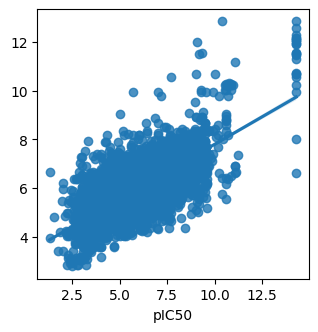

In [117]:
import lightgbm as ltb
import seaborn as sns
import matplotlib.pyplot as plt
model = ltb.LGBMRegressor()
model.fit(X,Y)
y_predicted = model.predict(X)
y_expected = Y
plt.figure(figsize=(3.5,3.5))
sns.regplot(x = y_expected, y = y_predicted, fit_reg=True)

In [118]:
import pickle
pickle.dump(model,open('data/trained_model.pkl','wb'))
